In [14]:
def __return_waypoints_ind():
    d = np.array([
    [ 65, -36],
    [ 56, -21],
    [ 66, -46],
    [ 58, -48],
    [ 67, -29],
    [ 61, -16],
    [ 45, -32],
    [ 71, -43],
    # [ 80, -52],
    # [ 68, -58],
    [ 65, -54],
    [ 48, -20],
    [ 64, -21],
    [ 46, -14]])
    return d


In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import os, sys
from helpers.highlevel_sceneloader import HighLevelSceneLoader
from predictors.dataset_creator import TFDataSet
import tensorflow as tf
from predictors.dl_trainer import DLTrainer 
from predictors.extended_predictor import extended_predictor 
import matplotlib.pyplot as plt
import pickle
from helpers.graph import Graph
import numpy as np

import warnings
warnings.filterwarnings('ignore')


''' set some parameters '''
# Model parameters
LSTM_LAYER_SIZE = 32
DENSE_LAYER_SIZE = 32
NUM_LSTM_LAYERS = 2
NUM_DENSE_LAYERS = 2
VARIABLE_INPUT_LENGTH = False

# Dataset
SEQ_IN_LEN = 3
SEQ_OUT_LEN = 4
NOISE_STD = .1
N_REPEATS = 1

BATCH_SIZE = 5
LENGTH_STRIDE = 2


# Training parameters
MAX_EPOCHS = 100
PATIENCE = 10

# For graph
GRAPH_DIST_THRESH = 4

''' get the data '''
ROOT = os.getcwd()

rel_p_img_b = 'helpers/analysed_vars_storage/img_bounds.xml'
rel_p_dests = 'helpers/analysed_vars_storage/destination_locations.xml'
p_img_bounds = os.path.join(ROOT, rel_p_img_b)
p_dest_locs = os.path.join(ROOT, rel_p_dests)

#TODO: older version of OpenTraj needed: "git checkout d249ba6951dd0f54b532fbe2ca6edc46b0d7093f"
opentraj_root = os.path.join(ROOT, 'OpenTraj')
root_datasets = os.path.join(ROOT, 'data/path_data')
sys.path.append(opentraj_root) # add package to pythonpath

scene_data = HighLevelSceneLoader(p_img_bounds, p_dest_locs)
scene_data.load_ind(root_datasets, 7, 17)


''' create the graph instance '''    
interest_points = __return_waypoints_ind()
g = Graph.from_matrices(interest_points, scene_data.destination_matrix, GRAPH_DIST_THRESH, .05)

df_signals = scene_data.df_to_lst_realxy_mats()
g.analyse_multiple_full_signals(df_signals, add_to_trams_mat=True)


[(array(['w7', 'd4'], dtype='<U2'), [(71, -43), (82.0, -53.0)]),
 (array(['wb'], dtype='<U2'), [(46, -14)]),
 (array(['wb', 'd7'], dtype='<U2'), [(46, -14), (36.0, -3.0)]),
 (array(['d8', 'w6', 'w3', 'w8', 'd3'], dtype='<U2'),
  [(27.0, -9.0), (45, -32), (58, -48), (65, -54), (70.0, -61.0)]),
 (array(['d8'], dtype='<U2'), [(27.0, -9.0)]),
 (array(['d3', 'w8', 'w3', 'w6', 'd8'], dtype='<U2'),
  [(70.0, -61.0), (65, -54), (58, -48), (45, -32), (27.0, -9.0)]),
 (array(['w3'], dtype='<U2'), [(58, -48)]),
 (array(['d4', 'w7', 'w0', 'w4', 'wa', 'w5', 'd0'], dtype='<U2'),
  [(82.0, -53.0),
   (71, -43),
   (65, -36),
   (67, -29),
   (64, -21),
   (61, -16),
   (53.0, -6.0)]),
 (array(['d5', 'w4', 'w0', 'w7', 'd4'], dtype='<U2'),
  [(72.0, -24.0), (67, -29), (65, -36), (71, -43), (82.0, -53.0)]),
 (array(['d4', 'w7', 'w0', 'w4', 'wa', 'w5', 'd0'], dtype='<U2'),
  [(82.0, -53.0),
   (71, -43),
   (65, -36),
   (67, -29),
   (64, -21),
   (61, -16),
   (53.0, -6.0)]),
 (array(['d3', 'w8', 'w3',

In [37]:

''' time to create df datasets '''
extra_features_dict = {
    "all_points": None,
    "all_destinations": None,
    "n_destinations": 5,
    "n_points": 5,
    "n_connected_points_after" : 3
}

# # Load data in order to not need to do calculations again
# with open("data/pickle/ds_creation_d/ds_7to17_inputLabels3_4_low_noise.pickle", 'rb') as handle: #"data/pickle/ds_creation_d/bs1.pickle"
#     my_ds_creation_dict = pickle.load(handle)

my_ds = TFDataSet.init_as_fixed_length(scene_data.traj_dataframe, graph=g, var_in_len=VARIABLE_INPUT_LENGTH, length_stride=LENGTH_STRIDE,
scale_list=["pos_x", "pos_y"], seq_in_length=SEQ_IN_LEN, label_length=SEQ_OUT_LEN,
extra_features_dict=extra_features_dict, noise_std=NOISE_STD, 
n_repeats=N_REPEATS, batch_size=BATCH_SIZE, save_folder = "data/pickle/ds_creation_d/ds_7to17_inputLabels3_4_low_noise.pickle") #ds_creation_dict=my_ds_creation_dict   


  1%|          | 6/568 [00:02<03:29,  2.68it/s]

continue2


  7%|▋         | 40/568 [00:13<02:07,  4.15it/s]

continue2


 24%|██▍       | 135/568 [00:56<02:27,  2.93it/s]

continue2


 37%|███▋      | 210/568 [01:21<01:08,  5.26it/s]

continue2


 62%|██████▎   | 355/568 [02:08<00:39,  5.39it/s]

continue2


 63%|██████▎   | 359/568 [02:08<00:28,  7.25it/s]

continue2


 72%|███████▏  | 408/568 [02:22<00:30,  5.32it/s]

continue2


 74%|███████▍  | 419/568 [02:28<01:20,  1.84it/s]

continue2


 84%|████████▍ | 479/568 [02:46<00:33,  2.68it/s]

continue2


 89%|████████▉ | 505/568 [02:52<00:15,  4.15it/s]

continue2


 90%|████████▉ | 509/568 [02:53<00:11,  4.98it/s]

continue2


 95%|█████████▌| 541/568 [03:01<00:04,  6.17it/s]

continue2


 24%|██▎       | 36/152 [00:13<00:56,  2.07it/s]

continue2


 51%|█████     | 77/152 [00:26<00:23,  3.23it/s]

continue2


 55%|█████▍    | 83/152 [00:27<00:16,  4.29it/s]

continue2


 59%|█████▉    | 90/152 [00:30<00:23,  2.62it/s]

continue2


 62%|██████▏   | 94/152 [00:31<00:18,  3.21it/s]

continue2
continue2


 77%|███████▋  | 117/152 [00:48<00:28,  1.24it/s]

continue2


 11%|█         | 8/76 [00:02<00:21,  3.22it/s]

continue2


100%|██████████| 76/76 [00:27<00:00,  2.75it/s]


In [18]:
for el in iter(my_ds_creation_dict["train"]):
    print(el["input_labels"].shape)
    print(el.keys())
    print(el)
    break

(1, 67, 2)
dict_keys(['xy', 'labels', 'input_labels', 'all_points', 'all_destinations', 'n_destinations', 'n_points', 'n_connected_points_after'])
{'xy': <tf.Tensor: shape=(1, 14, 2), dtype=float32, numpy=
array([[[-0.9388256,  1.4104702],
        [-1.0818808,  1.3854817],
        [-1.2189269,  1.4285727],
        [-1.3410748,  1.5145742],
        [-1.4565634,  1.6062106],
        [-1.567137 ,  1.700424 ],
        [-1.6523236,  1.7789117],
        [-1.6675748,  1.7882648],
        [-1.6768885,  1.7836546],
        [-1.7379085,  1.8447273],
        [-1.8342044,  1.9379013],
        [-1.9394906,  2.028906 ],
        [-2.0423381,  2.1226861],
        [-2.1421778,  2.21431  ]]], dtype=float32)>, 'labels': <tf.Tensor: shape=(1, 85, 2), dtype=float32, numpy=
array([[[ 44.82203, -12.24504],
        [ 43.32352, -10.80275],
        [ 41.88878,  -9.3199 ],
        [ 40.78345,  -8.08456],
        [ 40.58556,  -7.93735],
        [ 40.46471,  -8.00991],
        [ 39.67295,  -7.04867],
        [ 38.

In [19]:
# ''' time for some model training '''

# save_path = "data/model_weights/checkpoints/model_3_11_dests.pickle"

# my_trainer = DLTrainer(max_epochs=MAX_EPOCHS, patience=PATIENCE)
# my_trainer.LSTM_one_shot_predictor_named_i(my_ds, LSTM_LAYER_SIZE, DENSE_LAYER_SIZE, 
# NUM_LSTM_LAYERS, NUM_DENSE_LAYERS, extra_features=["all_destinations"], 
# var_time_len=VARIABLE_INPUT_LENGTH, size_dict=my_ds.size_dict)

# from datetime import datetime 

# folder_path = "data/model_weights/checkpoints/%s" % (datetime.now().strftime("%d_%m_%Y__%H_%M"))
# save_path = os.path.join(folder_path, "model_3_11_dests.pickle")            
# if not os.path.exists(folder_path):
#     os.mkdir(folder_path)
# my_trainer.compile_and_fit2(my_ds.tf_ds_dict["train"], my_ds.tf_ds_dict["val"], save_path=save_path)

In [20]:
NUM_LSTM_LAYERS

2

In [75]:
''' or some model loading '''

model_path = "data/model_weights/checkpoints/cp_path_pred_kpi/24_08_2021__09_19/destTrueconnpFalseallpFalse.pickle"

my_trainer = DLTrainer(max_epochs=MAX_EPOCHS, patience=PATIENCE)
my_trainer.LSTM_one_shot_predictor_named_i(my_ds, 32, 32, 
NUM_LSTM_LAYERS, NUM_DENSE_LAYERS, extra_features=["all_destinations"], 
var_time_len=VARIABLE_INPUT_LENGTH, size_dict=my_ds.size_dict, epistemic=True, dropout_rate=0.05)
my_trainer.load_weights(model_path)

3
KerasTensor(type_spec=TensorSpec(shape=(None, 3, 2), dtype=tf.float32, name='in_xy'), name='in_xy', description="created by layer 'in_xy'")
KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='flatten_8/Reshape:0', description="created by layer 'flatten_8'")
KerasTensor(type_spec=TensorSpec(shape=(None, 9, 3), dtype=tf.float32, name='all_destinations'), name='all_destinations', description="created by layer 'all_destinations'")


In [162]:
''' time for some model predictions '''
my_predictor = extended_predictor(g, my_trainer, 1)

nxt_unsc, nxt_sc = my_ds.example_dict("test", "in_xy")

# Let's extract just one path to make visualisation clearer
unscaled_ex = dict(nxt_unsc[0]), nxt_unsc[1]
scaled_ex = dict(nxt_sc[0]), nxt_sc[1]
# let's get an example of length one
for key in unscaled_ex[0].keys():
    unscaled_ex[0][key] = tf.expand_dims(nxt_unsc[0][key][0], axis=0)
for key in scaled_ex[0].keys():
    scaled_ex[0][key] = tf.expand_dims(nxt_sc[0][key][0], axis=0)   

In [163]:
# Basic prediction, but repeated (one at a time)
#PROBLEM: input is scaled
assembled_output, destination_list, dest_prob_dict = my_predictor.predict_to_destinations(input_dict=unscaled_ex[0], 
num_steps = 20, variable_len_input=VARIABLE_INPUT_LENGTH, num_predictions=15, norm_probs=True, abs_probs=False)
# Epistemic uncertainty prediction


KeyboardInterrupt: 

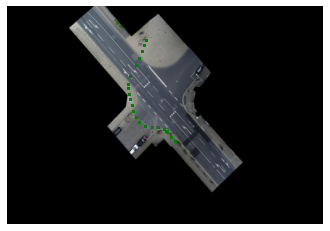

In [116]:
scene_data.plot_aggregated_probs_progress(assembled_output[:,:,:,:], dest_prob_dict, grid_resolution=3, invert_y=True,
disable_axes=True, alpha_val = .7, min_steps = 0, max_steps = 20, lst_real_xy_mats=[scaled_ex[0]["input_labels"]],
)

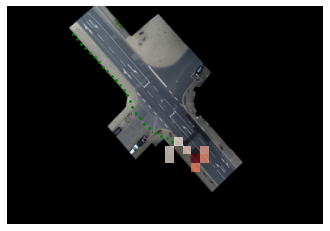

In [161]:
scene_data.plot_aggregated_output_probs(assembled_output[:,:,6,:], dest_prob_dict, grid_resolution=3, invert_y=True,
disable_axes=True, alpha_val = .7, lst_real_xy_mats=[scaled_ex[0]["input_labels"]], save_path="all_no_epi.png")

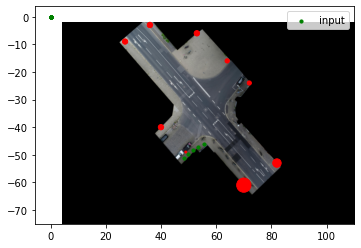

In [109]:
i=0
fig1, ax = plt.subplots()
scene_data.plot_on_image([scaled_ex[0]["input_labels"][i]], 
save_path='data/images/final_notebook/example_prediction.png', ms = [10, 6], ax=ax, colors=["green", "blue"],
col_num_dicts=[my_ds.generalised_out_dict], labels=["input"], image_provided=False)

dest_locs = scaled_ex[0]["all_destinations"][i][:, 0:2]
dest_probs = scaled_ex[0]["all_destinations"][i][:, 2:3]

scene_data.plot_dest_probs(dest_locs, dest_probs, 2, 200,
ax = ax)

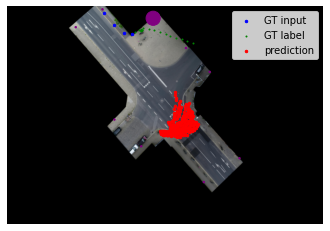

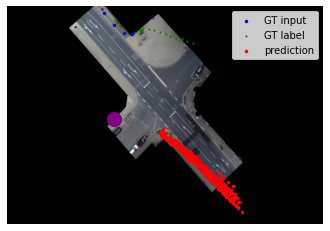

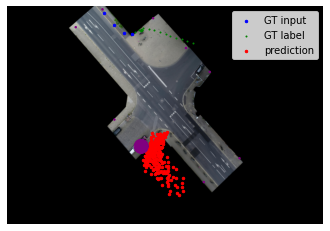

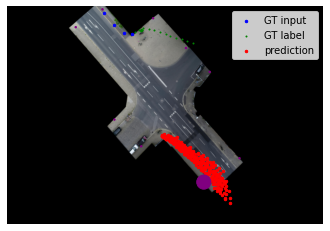

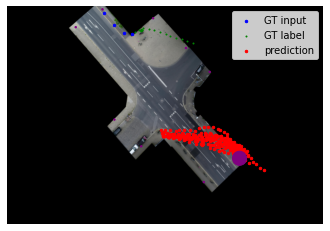

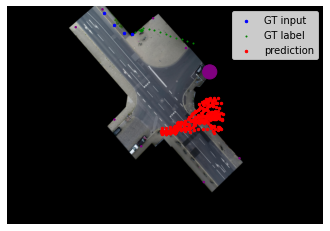

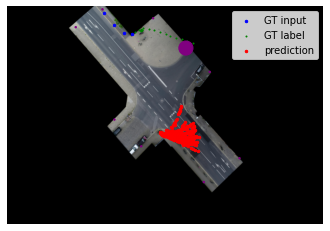

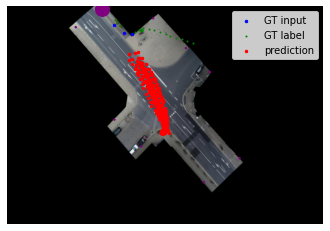

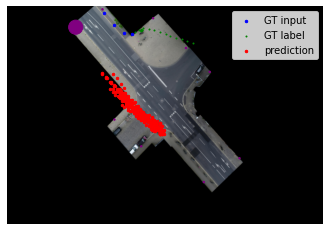

In [124]:
# PLOT BASIC PREDICTION
# create dicts for correctly displaying data    

# input_number = 4

# unscaled_ex_ = dict(nxt_unsc[0]), nxt_unsc[1][input_number]
# # let's get an example of length one
# for key in unscaled_ex_[0].keys():
#     unscaled_ex_[0][key] = tf.expand_dims(unscaled_ex_[0][key][input_number], axis=0)

# assembled_output, destination_list, dest_prob_dict = my_predictor.predict_to_destinations(unscaled_ex_[0], 11, 1, VARIABLE_INPUT_LENGTH)

for i in range(9):
    fig1, ax1 = plt.subplots()

    scene_data.plot_on_image([unscaled_ex_[0]["input_labels"], unscaled_ex_[0]["labels"], assembled_output[i]], 
    save_path='data/images/final_notebook/example_prediction.png', ms = [6, 1, 6], ax=ax1, colors = ['blue', 'green', 'red'],
    col_num_dicts=[my_ds.generalised_in_dict, my_ds.generalised_out_dict,my_ds.generalised_out_dict], labels=["GT input", "GT label", "prediction"],
    hide_axes=True)
    
    dest_locs = destination_list[i][:, :, 0:2]
    dest_probs = destination_list[i][:, :, 2:3]
    
    scene_data.plot_dest_probs(dest_locs[0], dest_probs[0], 2, 200,
    ax = ax1, save_path = "data/images/adjusted_dest/"+str(i)+".png", color="purple")

In [73]:
unscaled_ex[0].keys()

dict_keys(['labels', 'input_labels', 'all_points', 'all_destinations', 'n_destinations', 'n_points', 'n_connected_points_after', 'in_xy'])

In [93]:
ass_out_resh

<tf.Tensor: shape=(300, 2), dtype=float32, numpy=
array([[ 53.091095 ,  -9.982044 ],
       [ 54.48001  , -11.0906315],
       [ 55.299946 , -12.028469 ],
       [ 56.22097  , -12.937012 ],
       [ 57.484932 , -15.21657  ],
       [ 58.60121  , -16.68612  ],
       [ 59.266464 , -18.085411 ],
       [ 59.941303 , -19.45072  ],
       [ 61.43778  , -21.030033 ],
       [ 62.130108 , -23.077606 ],
       [ 62.661655 , -25.044619 ],
       [ 63.14069  , -26.849463 ],
       [ 63.95107  , -29.539701 ],
       [ 64.35668  , -32.083256 ],
       [ 64.82704  , -34.545628 ],
       [ 65.1679   , -36.836586 ],
       [ 65.94622  , -39.38974  ],
       [ 66.97158  , -42.13425  ],
       [ 68.26199  , -44.818462 ],
       [ 69.394806 , -47.33781  ],
       [ 53.847614 , -14.443275 ],
       [ 55.000122 , -15.686157 ],
       [ 55.756195 , -16.719492 ],
       [ 56.481857 , -17.738192 ],
       [ 57.61752  , -20.978481 ],
       [ 58.902878 , -21.78109  ],
       [ 59.7766   , -22.548824 ],
     

In [101]:
remove_padding_vals(scaled_ex[0]["input_labels"][0])

<tf.Tensor: shape=(21, 2), dtype=float32, numpy=
array([[ 36.52051,  -4.2329 ],
       [ 39.68891,  -8.237  ],
       [ 43.17372, -10.96981],
       [ 45.87157, -11.25375],
       [ 47.03464, -10.47621],
       [ 48.41434,  -9.9802 ],
       [ 49.10177,  -9.87653],
       [ 49.09309,  -9.80739],
       [ 48.88221,  -9.80213],
       [ 48.80585,  -9.86365],
       [ 48.77809, -10.00952],
       [ 48.82646,  -9.97876],
       [ 48.85715,  -9.9729 ],
       [ 48.84065,  -9.96946],
       [ 48.81809,  -9.98864],
       [ 48.80229,  -9.97806],
       [ 48.9215 , -10.08755],
       [ 48.97831, -10.12655],
       [ 48.78694,  -9.87245],
       [ 49.52075,  -9.35103],
       [ 51.47932,  -9.53124]], dtype=float32)>

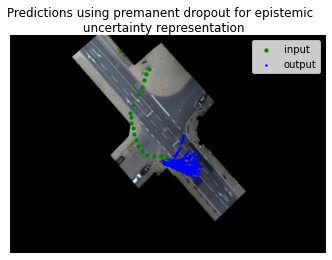

In [123]:
dest_id = 6
ass_out_resh = tf.reshape(assembled_output[dest_id,:,:,:], (-1, 2))
from helpers.accuracy_functions import remove_padding_vals

fig1, ax = plt.subplots()
scene_data.plot_on_image([remove_padding_vals(scaled_ex[0]["input_labels"][0]), ass_out_resh], 
save_path='data/images/final_notebook/example_prediction__4.png', ms = [10, 2], ax=ax, colors=["green", "blue"],
col_num_dicts=[my_ds.generalised_out_dict], labels=["input", "output"], image_provided=False, hide_axes=True,
title="Predictions using premanent dropout for epistemic \n uncertainty representation")

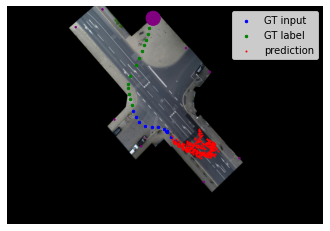

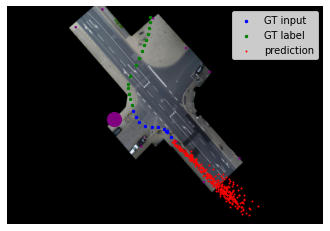

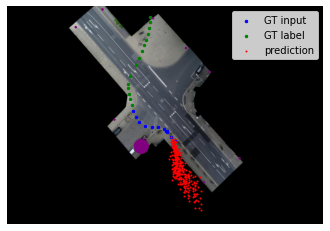

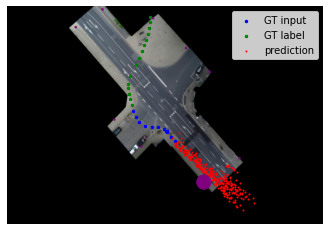

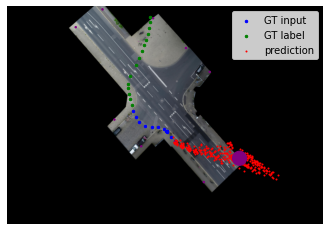

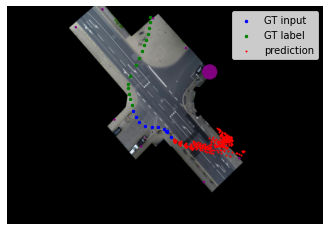

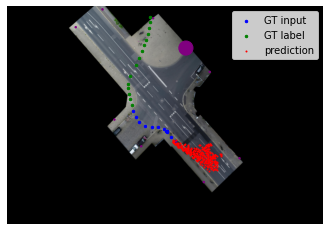

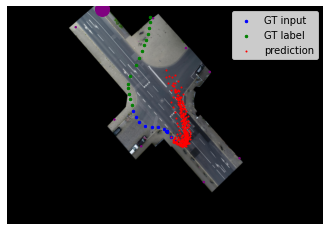

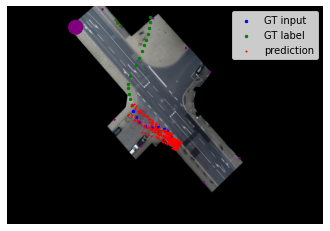

In [164]:
# Plot the epistemic stuff for each destination
from helpers.accuracy_functions import remove_padding_vals

for i in range(9):
    fig1, ax1 = plt.subplots()
    ass_out_resh = tf.reshape(assembled_output[i,:,:,:], (-1, 2))
    scene_data.plot_on_image([remove_padding_vals(scaled_ex[0]["input_labels"][0]), remove_padding_vals(scaled_ex[0]["labels"][0]), ass_out_resh], 
    save_path='data/images/final_notebook/example_prediction_'+str(i)+'.png', ms = [6, 6, 1], ax=ax1, colors = ['blue', 'green', 'red'],
    col_num_dicts=[my_ds.generalised_in_dict, my_ds.generalised_out_dict,my_ds.generalised_out_dict], labels=["GT input", "GT label", "prediction"],
    hide_axes=True)
    
    dest_locs = destination_list[i][:, :, 0:2]
    dest_probs = destination_list[i][:, :, 2:3]
    
    scene_data.plot_dest_probs(dest_locs[0], dest_probs[0], 2, 200,
    ax = ax1, save_path = "data/images/adjusted_dest/"+str(i)+".png", color="purple")